**stock prediction by deep learning**

In [2]:
cd /content/drive/My Drive/pp/stock_saham

/content/drive/My Drive/pp/stock_saham


In [3]:
#import the packages
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [4]:
dataset_train = pd.read_csv('TrainData.csv')
training_set = dataset_train.iloc[:, 1:2].values  #OPEN COLU

In [5]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [6]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
print(training_set.shape)

(2035, 1)


In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(1975, 60)

In [12]:
y_train.shape

(1975,)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1975, 60, 1)

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0101
Epoch 2/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 1s 15ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 13/100
62/62 [=====

In [16]:
dataset_test = pd.read_csv('TestData.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values 

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

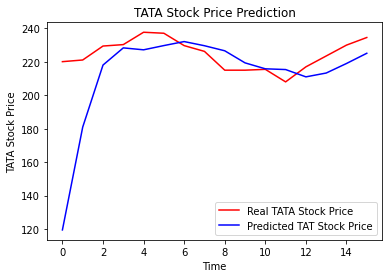

In [18]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

**stock prediction by SVM**

In [19]:
!pip install quandl

In [20]:
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [21]:
#Get the stock data
df = quandl.get("WIKI/AMZN")
# Take a look at the data
print(df.head())

# Get the Adjusted Close Price
df = df[['Adj. Close']]
#Take a look at the new data
print(df.head())

             Open   High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                   
1997-05-16  22.38  23.75  20.50  ...  1.708333    1.729167   14700000.0
1997-05-19  20.50  21.25  19.50  ...  1.625000    1.708333    6106800.0
1997-05-20  20.75  21.00  19.63  ...  1.635833    1.635833    5467200.0
1997-05-21  19.25  19.75  16.50  ...  1.375000    1.427500   18853200.0
1997-05-22  17.25  17.38  15.75  ...  1.312500    1.395833   11776800.0

[5 rows x 12 columns]
            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


In [22]:

# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the new data set
print(df.tail())




            Adj. Close  Prediction
Date                              
2018-03-21     1581.86         NaN
2018-03-22     1544.10         NaN
2018-03-23     1495.56         NaN
2018-03-26     1555.86         NaN
2018-03-27     1497.05         NaN


In [23]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))
print('--------------------------------')
#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)
print('--------------------------------')
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

--------------------------------
[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]
--------------------------------
[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


In [24]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9517665275971088


In [26]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9886969423080303


In [27]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)
print('----------------------------------------')
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]
[1053.16598232 1550.58502423  669.17149269 1076.73654424  669.13827851
  669.13827851  669.13827851  669.13827851  669.13827851  669.13827851
  669.13827851  669.13827851  669.13827851  669.13827851  669.13827851
  669.13827851  669.13827851  669.13827851  669.13827851  669.13827851
  669.13827851  669.13827851  669.13827851  669.13827851  669.13827851
  669.13827851  669.13827851  669.13827851  669.13827851  669.13827851]
----------------------------------------
[1497.82342051 1536.59817584 1547.96319033 1534.09384024 1554.95622912
 1570.41731793 1572.36985077 1588.5419162  1611.83435953 1601.25460281
 1601.75334761 1581.59132377 1588.80720599 1613.59588372 16